<a href="https://colab.research.google.com/github/fatma920/DataEngineering/blob/main/Fake_or_True_news_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Reading Fake ***news***

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Loading the data
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')


In [ ]:
data= fake.append(true)

<ipython-input-37-2396ec8f6bdb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data= fake.append(true)


In [ ]:
data.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

df= data.copy()
df.drop( ['date'], inplace= True, axis=1)

df.head(5)

title  \
0         Russia urges dialogue to solve Gulf crisis   
1  TRUMP’S DOJ CHOOSES SIDES In Supreme Court Cas...   
2  Trump eyes Supreme Court after appeals court r...   
3   Trump TERRIFIES THE HELL Out Of Dept. Of Ener...   
4  Brazil president sees lower house pension refo...   

                                                text       subject  
0  JEDDAH (Reuters) - Arab countries and Qatar sh...     worldnews  
1  The double standard in our judicial system tod...     left-news  
2  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews  
3  Trump s transition team is certainly doing a g...          News  
4  SAO PAULO (Reuters) - Brazilian President Mich...     worldnews

In [ ]:
print(df.info())
print("---------------")
print(data.head())
print("---------------")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB
None
---------------
                                               title  \
0         Russia urges dialogue to solve Gulf crisis   
1  TRUMP’S DOJ CHOOSES SIDES In Supreme Court Cas...   
2  Trump eyes Supreme Court after appeals court r...   
3   Trump TERRIFIES THE HELL Out Of Dept. Of Ener...   
4  Brazil president sees lower house pension refo...   

                                                text       subject  \
0  JEDDAH (Reuters) - Arab countries and Qatar sh...     worldnews   
1  The double standard in our judicial system tod...     left-news   
2  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
3  Trump s transition team is

In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df.dtypes

title      object
text       object
subject    object
dtype: object

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


<ipython-input-43-574024f277ac>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in fake.subject.value_counts().iteritems():


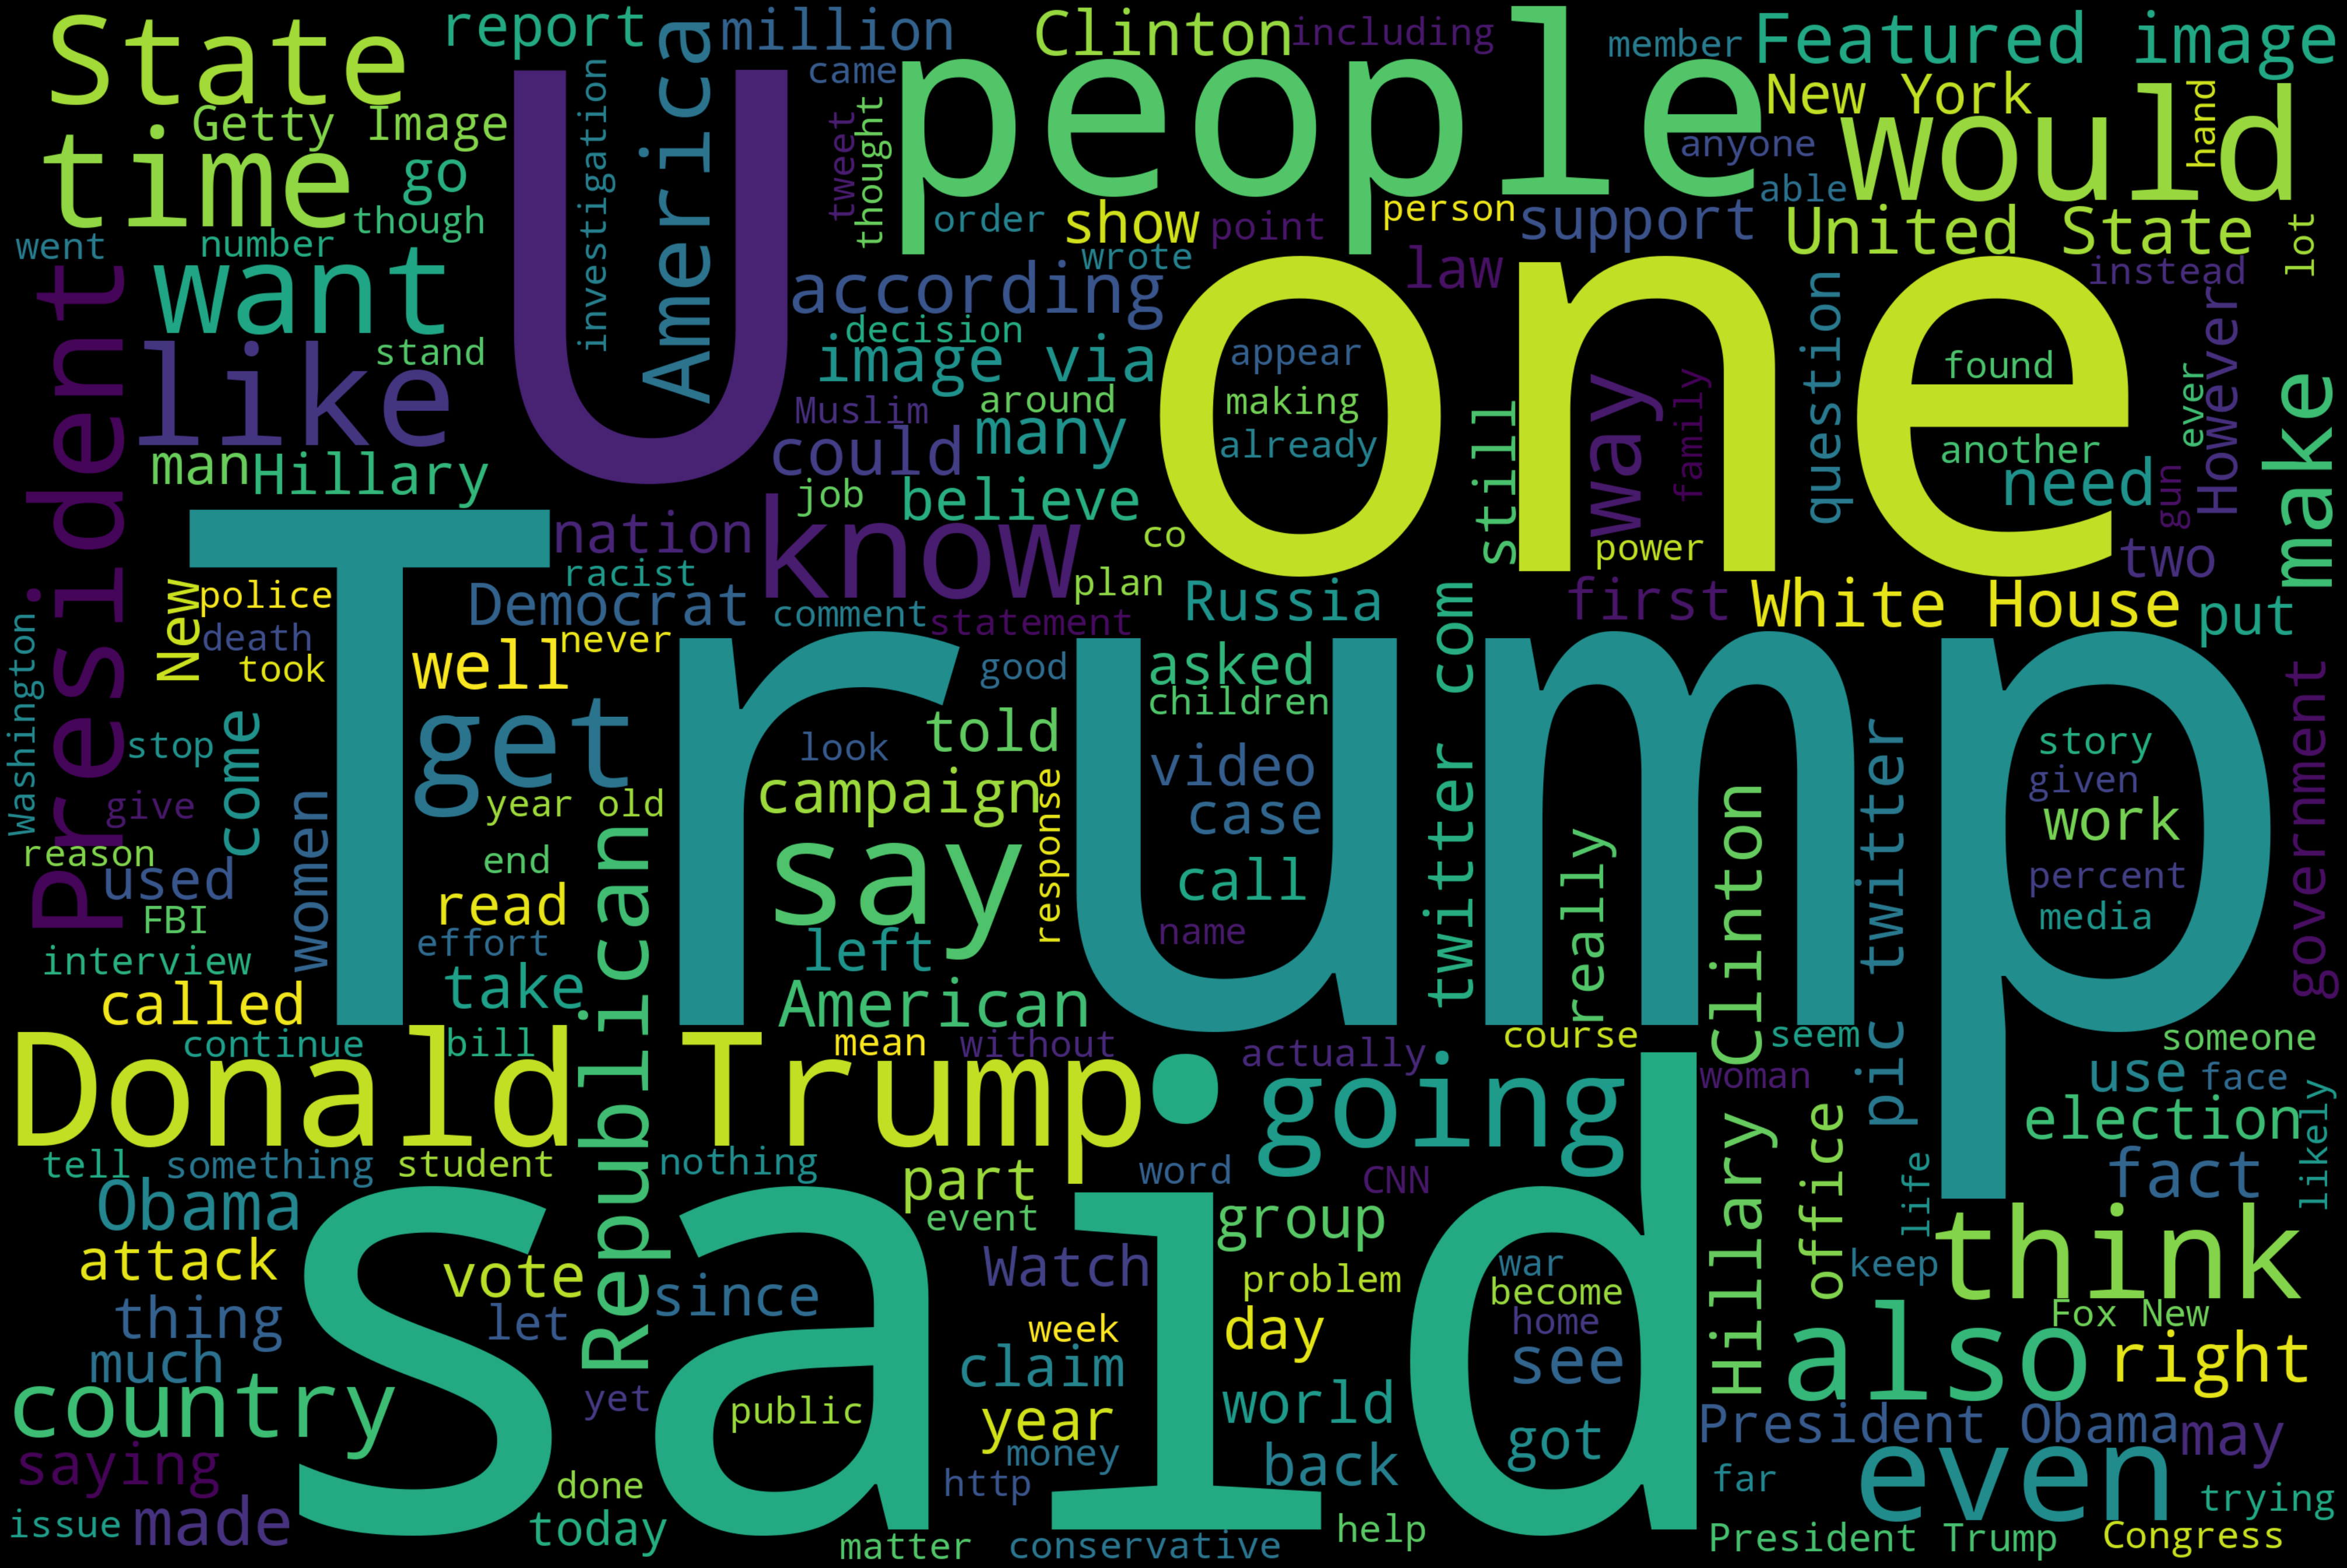

In [ ]:
#Counting by Subjects
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")

#Getting Total Rows
print(f"Total Records:\t{fake.shape[0]}")
#Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')

In [ ]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

<ipython-input-46-344072e23b78>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in true.subject.value_counts().iteritems():


politicsNews:	11272
worldnews:	10145
Total Records:	21417


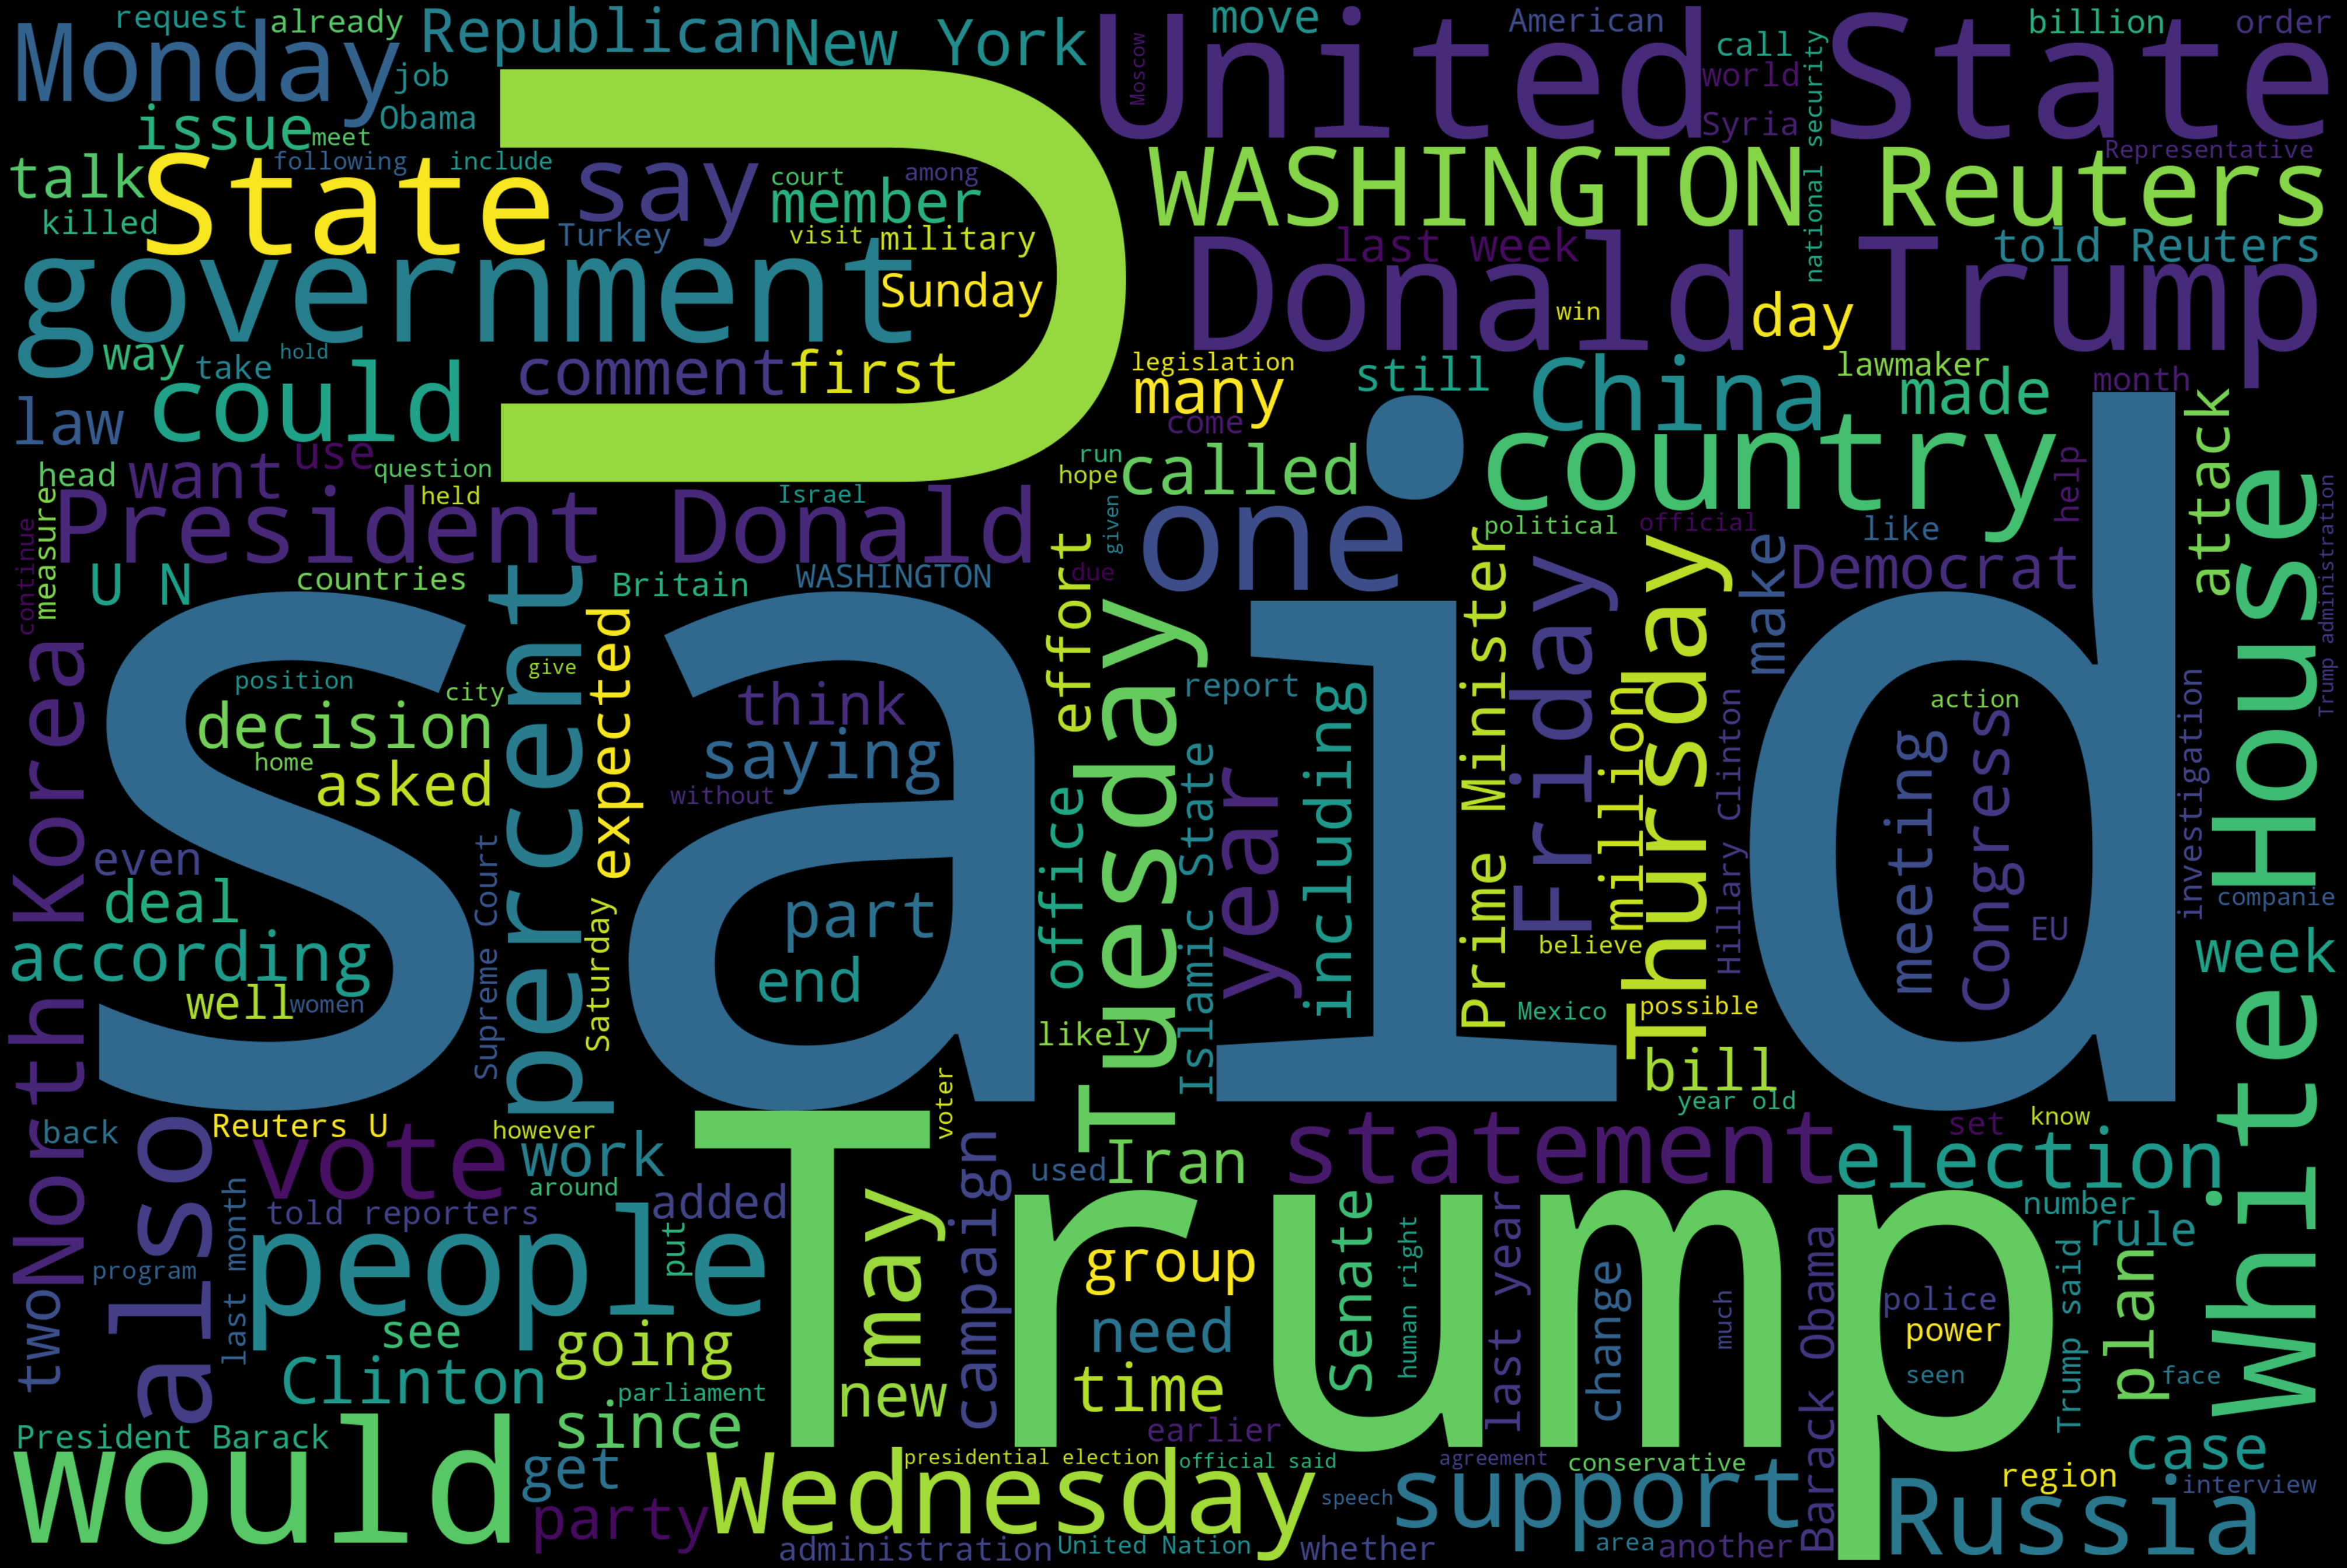

In [ ]:
#Counting by Subjects
for key,count in true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")

#Getting Total Rows
print(f"Total Records:\t{true.shape[0]}")
#Word Cloud
text = ''
for news1 in true.text.values:
    text += f" {news1}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
import re

def is_twitter_text(text):
    # Regular expressions for Twitter-related patterns
    twitter_patterns = [
        r"@\w+",         # Mention (@username)
        r"#\w+",         # Hashtag (#hashtag)
        r"https?://\S+", # URLs
    ]

    # Check if any of the patterns match in the text
    for pattern in twitter_patterns:
        if re.search(pattern, text):
            return True

    return False


is_twitter_text('title')

False

**Cleaning Data**

Removing Reuters or Twitter Tweet information from the text

Text can be splitted only once at " - " which is always present after mentioning source of publication, this gives us publication part and text part
If we do not get text part, this means publication details was't given for that record
The Twitter tweets always have same source, a long text of max 259 characters
add Codeadd Markdown

In [ ]:
real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [ ]:
# we have list of indices where publisher is not mentioned
#lets check
real.iloc[unknown_publishers].text
#true, they do not have text like "WASHINGTON (Reuters)"

1146     Trump 'committed' to U.S. renewable fuels: Iow...
1711     Trump on Twitter (Sept 15): London attack, Cha...
2102     Fellow Republicans assail Trump after he defen...
2140     Trump on Twitter (Aug 16)- Manufacturing Counc...
2247     Trump on Twitter (August 10): Mitch McConnell ...
2262     Trump on Twitter (August 8): Opioid crisis, No...
2275     Trump on Twitter (Aug 7): Fake News, Senator R...
2510     U.S. senators seek ban on pesticide chlorpyrif...
3466     U.S. coal stocks fall; exit from climate deal ...
3488     White House unveils list of ex-lobbyists grant...
3615     Texas House passes 'bathroom bill' targeting p...
3930     Trump on Twitter (May 3): Betsy Devos, Mahmoud...
3944     Trump on Twitter (May 2): Shutdown, legislatio...
3976     Republicans begin final push on killing Obama-...
4358     Factbox: Trump Supreme Court appointee to affe...
4465     Window closing for Republican stealth assault ...
5246     Kuwait could pay up to $60,000 for party at Tr.

In [ ]:
real.iloc[8970]


title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
#Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)

        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [ ]:
#Replace existing text column with new text
#add seperate column for publication info
real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [ ]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0   The head of a conservative Republican faction...  politicsNews   
1   Transgender people will be allowed for the fi...  politicsNews   
2   The special counsel investigation of links be...  politicsNews   
3   Trump campaign adviser George Papadopoulos to...  politicsNews   
4   President Donald Trump called on the U.S. Pos...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [ ]:
#checking for rows with empty text like row:8970
[index for index,text in enumerate(real.text.values) if str(text).strip() == '']

[8970]

In [ ]:
#dropping this record
real = real.drop(8970, axis=0)

In [ ]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


title text    subject  \
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015

In [ ]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


title text    subject  \
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015

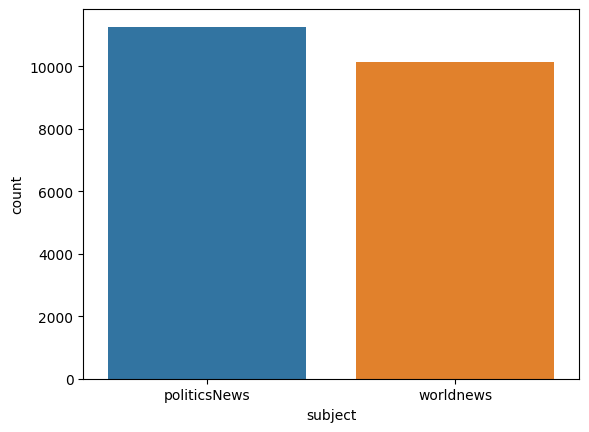

In [ ]:
sns.countplot(x="subject", data=real)
plt.show()

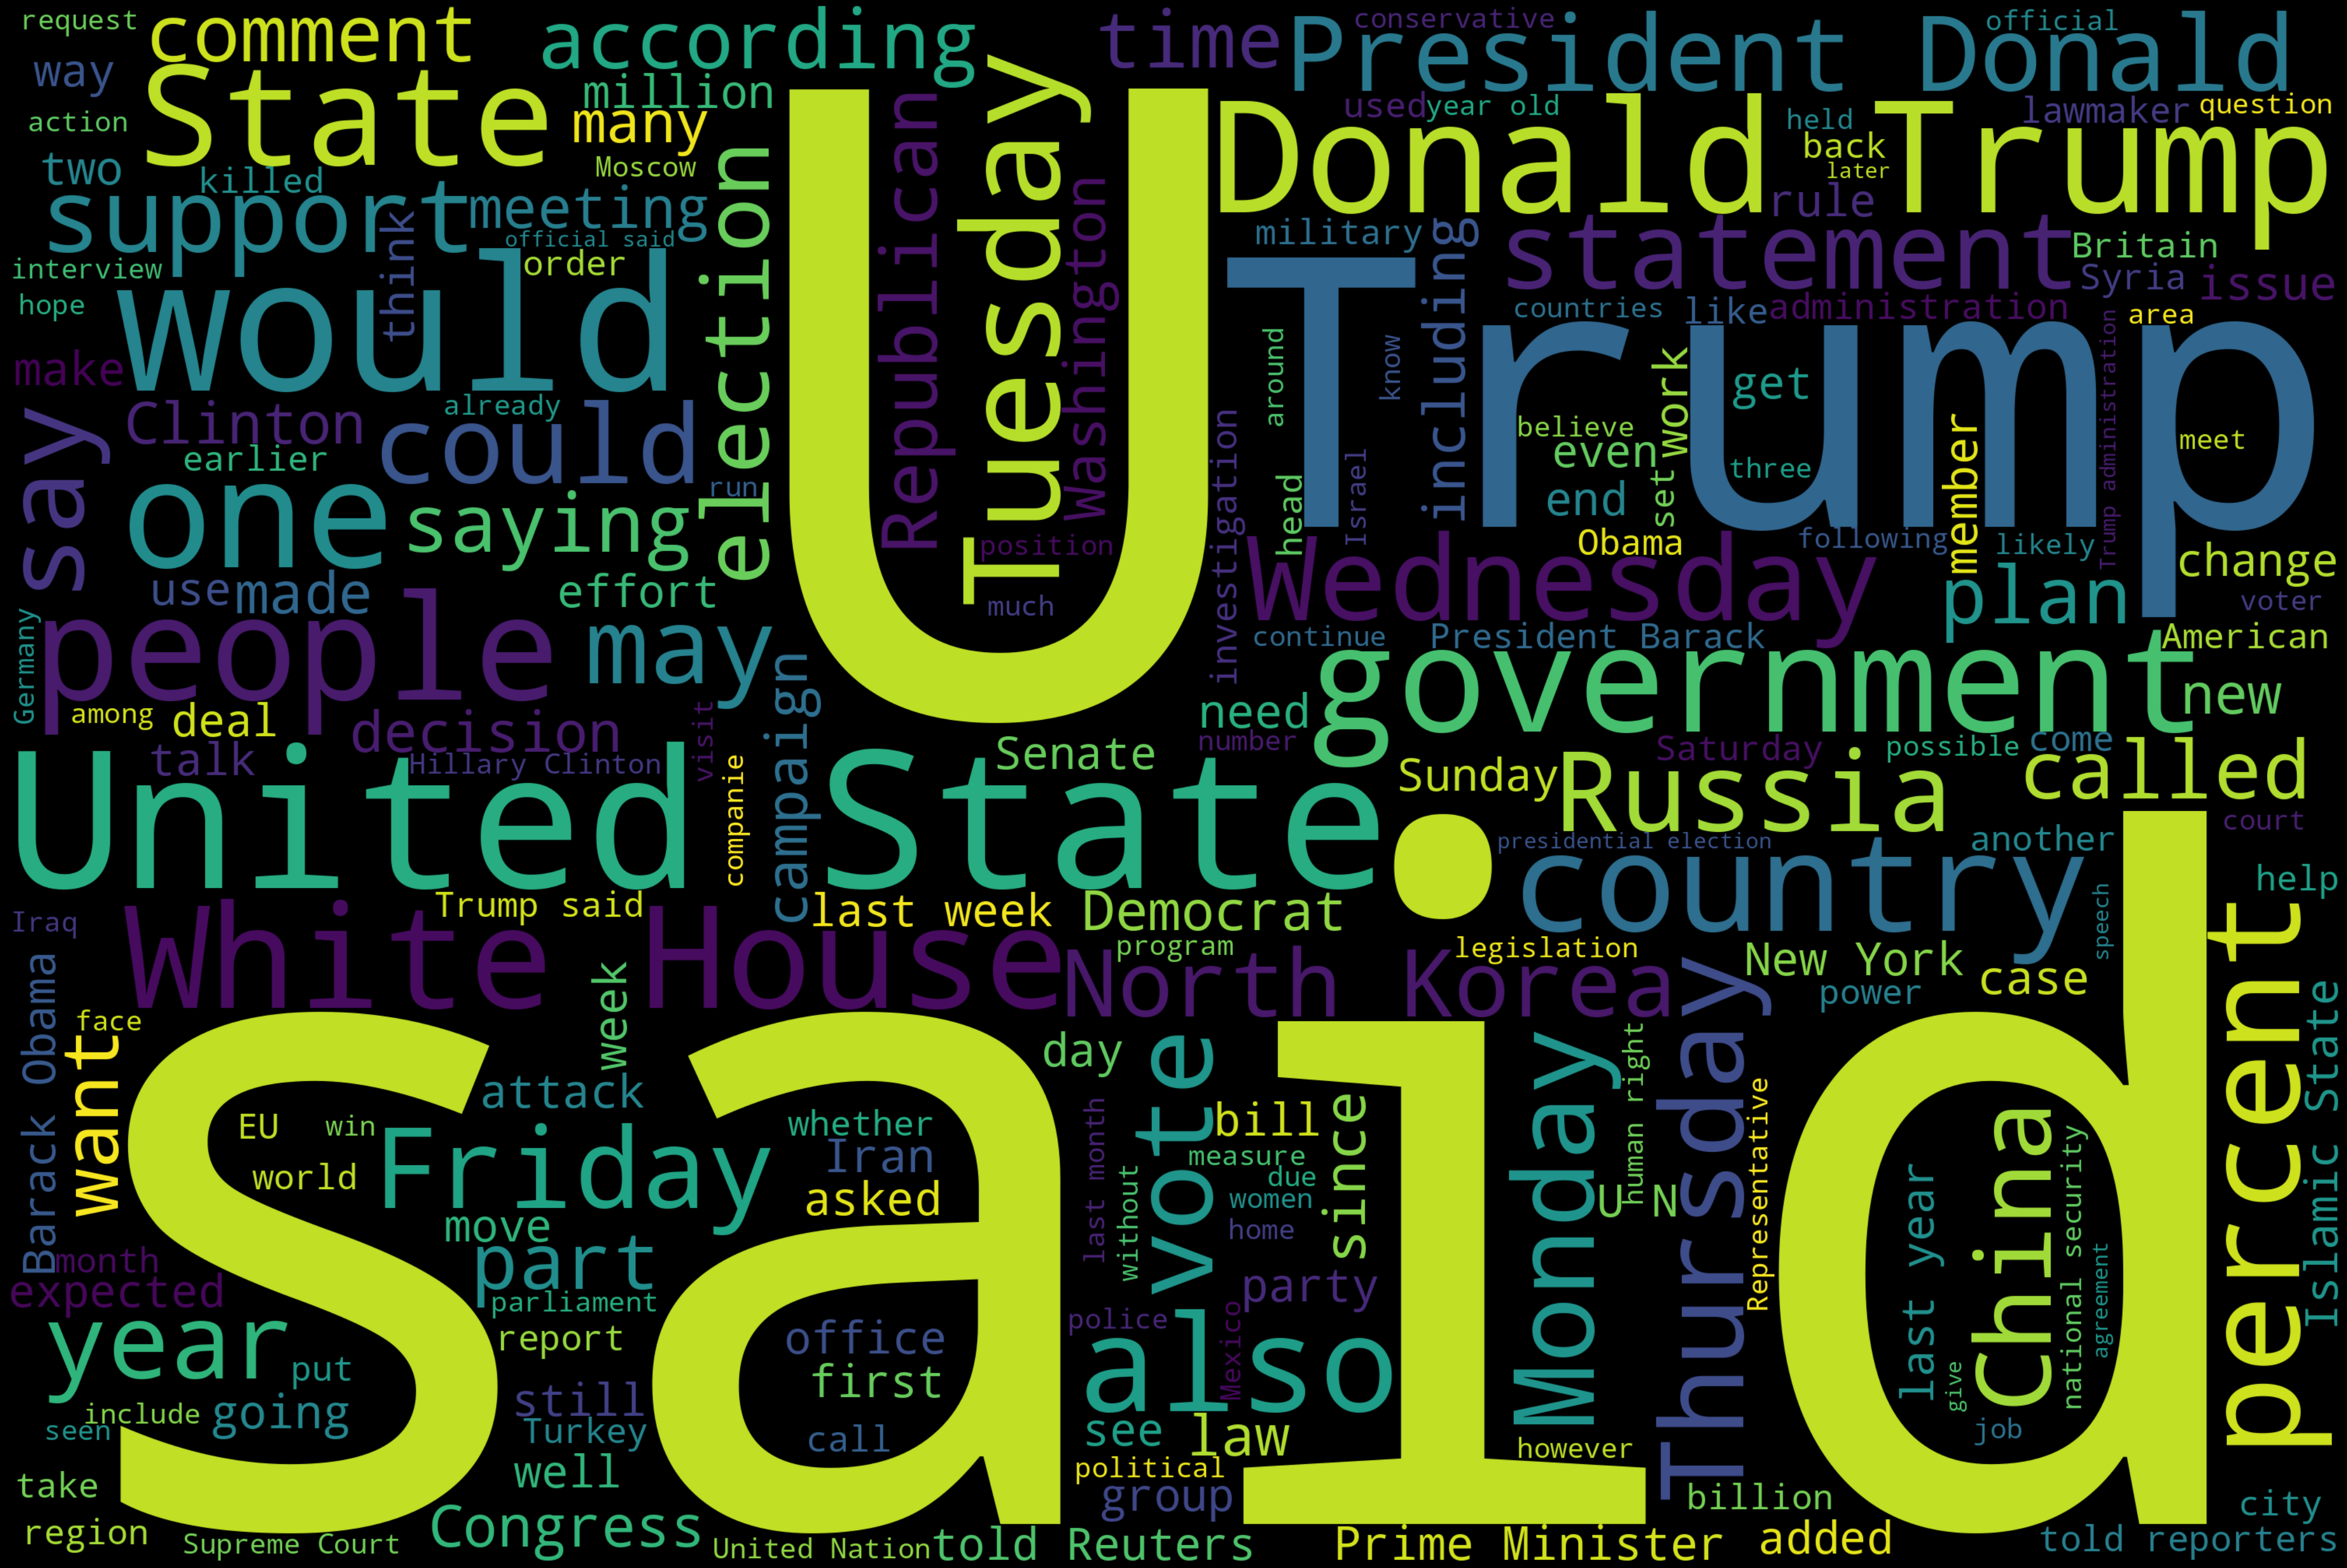

In [ ]:
#WordCloud For Real News
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake.csv')
real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')

***Preproccesing Data***

In [ ]:
fake['class']= 0
real['class']= 1

In [ ]:
#Combining Title and Text
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [ ]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [ ]:
#Combining both into new dataframe
data = real.append(fake, ignore_index=True)
del real, fake

<ipython-input-70-462bca08ab04>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Removing StopWords, Punctuations and single-character words


In [ ]:
y = data["class"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

**### Vectorization -- Word2Vec**

Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.



In [ ]:
import gensim

In [ ]:
from gensim.test.utils import common_texts
import gensim.models
from gensim.models import Word2Vec

In [ ]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = Word2Vec(sentences=common_texts, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
# Dimension of vectors we are generating
EMBEDDING_DIM = 100
# Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)



In [ ]:
#vocab size
len(w2v_model.wv.key_to_index)

#We have now represented each of 122248 words by a 100dim vector.

122118

**Exploring Vectors**

Lets checkout these vectors

In [ ]:
#see a sample vector for random word, lets say Corona

w2v_model.wv["corona"]
w2v_model.wv.most_similar("iran")
w2v_model.wv.most_similar("fbi")
w2v_model.wv.most_similar("facebook")
w2v_model.wv.most_similar("computer")

[('computers', 0.8381586074829102),
 ('software', 0.7958641648292542),
 ('malware', 0.7911887168884277),
 ('laptop', 0.7702974677085876),
 ('servers', 0.7498809695243835),
 ('electronic', 0.7479220628738403),
 ('encrypted', 0.7345343232154846),
 ('kaspersky', 0.7070267796516418),
 ('scanning', 0.7020968198776245),
 ('devices', 0.6943062543869019)]

In [ ]:
#Feeding US Presidents
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])
#First was Bush

[('bush', 0.5264387726783752),
 ('cruz', 0.523527979850769),
 ('elect', 0.5102043747901917),
 ('hillary', 0.5053926110267639),
 ('incoming', 0.5052268505096436),
 ('crooked', 0.4767555892467499),
 ('actually', 0.47348904609680176),
 ('kissingers', 0.4658667743206024),
 ('course', 0.4537959396839142),
 ('outright', 0.45172709226608276)]

***Tokenizing Text***
These Vectors will be passed to LSTM/GRU instead of words. 1D-CNN can further be used to extract features from the vectors.


Keras has implementation called "**Embedding Layer**" which would create word embeddings(vectors). Since we did that with gensim's word2vec, we will load these vectors into embedding layer and make the layer non-trainable.



In [ ]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[317, 206, 16, 6174, 105, 684, 158, 1014, 2889, 45]

In [ ]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
also -> 8
new -> 9
obama -> 10


We can pass numerical representation of words into neural network.

We can use Many-To-One (Sequence-To-Word) Model of RNN, as we have many words in news as input and one output ie Probability of being Real.

For Many-To-One model, lets use a fixed size input.


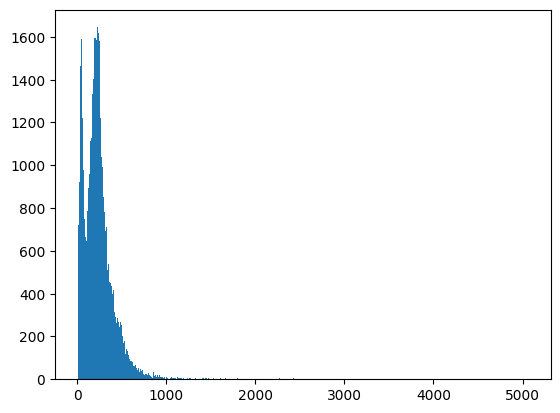

In [ ]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in X], bins=500)
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :)

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])
# Out of 48k news, 44k have less than 700 words

44000

In [ ]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
#all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

We Create a matrix of mapping between word-index and vectors. We use this as weights in embedding layer

Embedding layer accepts numecical-token of word and outputs corresponding vercor to inner layer.

It sends vector of zeros to next layer for unknown words which would be tokenized to 0.


Input length of Embedding Layer is the length of each news (700 now due to padding and truncating)

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv, word_index)

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model.summary()

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int")

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))